In [1]:
from Const import Dissertation_Const_1D

In [8]:
import numpy as np
import matplotlib.pyplot as plt

In [10]:
def plot_travelling_wave_form_by_front(model, target='N', t_indices=None,
                                       threshold=0.5, band=(0.1,0.9), spline_type='cubic'):
    if t_indices is None:
        t_indices = np.linspace(int(0.5*model.Nt), model.Nt-1, 10, dtype=int)
    
    # Detect front positions
    t_fronts, x_fronts = model.track_wavefront_local_interpolation(
        t_start=model.times[t_indices[0]],
        t_end=model.times[t_indices[-1]],
        num_points=len(t_indices),
        threshold=threshold, band=band, spline_type=spline_type, target=target
    )
    
    u_arr = model.N_arr if target.lower() == 'n' else model.M_arr
    
    plt.figure(figsize=(8,5))
    for i, tidx in enumerate(t_indices):
        t = model.times[tidx]
        if len(t_fronts) > 1:
            x_front = np.interp(t, t_fronts, x_fronts)
        else:
            x_front = 0.0
        shift_x = model.x - x_front
        plt.plot(shift_x, u_arr[tidx], label=f"t={t:.1f}")
    
    plt.xlabel(r"$x - x_{\mathrm{front}}(t)$")
    plt.ylabel(f"{target}(x,t)")
    plt.title("Travelling wave form (aligned by front)")
    plt.legend()
    plt.grid(True)
    plt.show()

In [3]:
model = Dissertation_Const_1D(m0 = 0.8, const = .100, k = 0.1, n0 = 0.5, L = 100, N = 1001, T = 120, dt = 0.01)

In [4]:
model.solve()

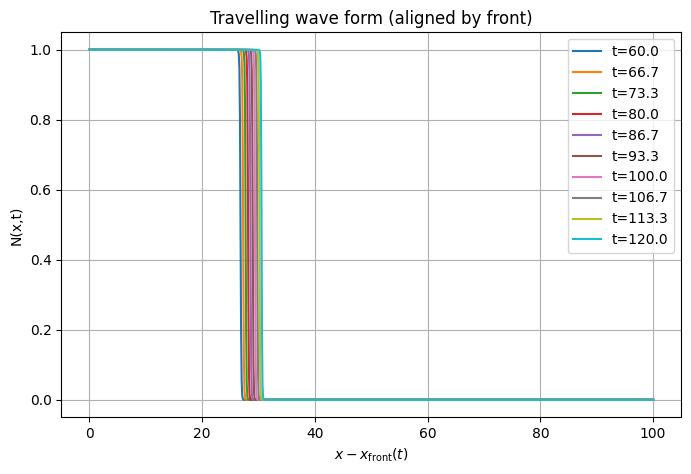

In [12]:
plot_travelling_wave_form_by_front(model, target='N')

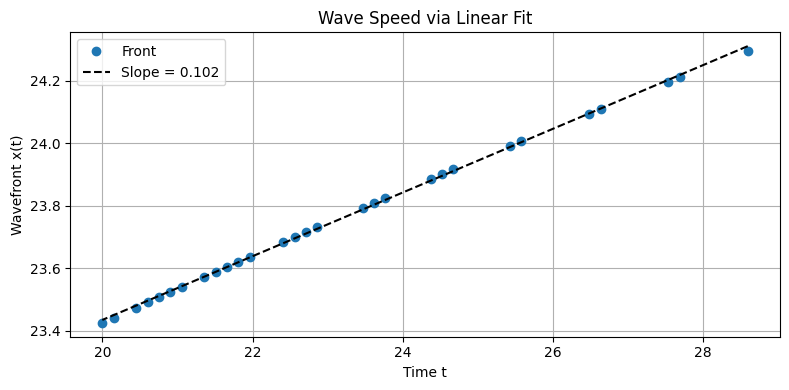

Estimated speed = 0.1020, R² = 0.9995


(np.float64(0.10197114279045913),
 np.float64(21.39546733057198),
 np.float64(0.9995089583560183))

In [21]:
model.estimate_wave_speed(t_start=50, t_end=model.T - 100, target='N', threshold=0.5, band=(0.1, 0.9), spline_type='cubic')

In [39]:
model2 = Dissertation_Const_1D(m0 = 0.95, const = 100, k = 100, n0 = 1, L = 100, N = 1001, T = 120, dt = 0.01)

In [40]:
model2.solve()

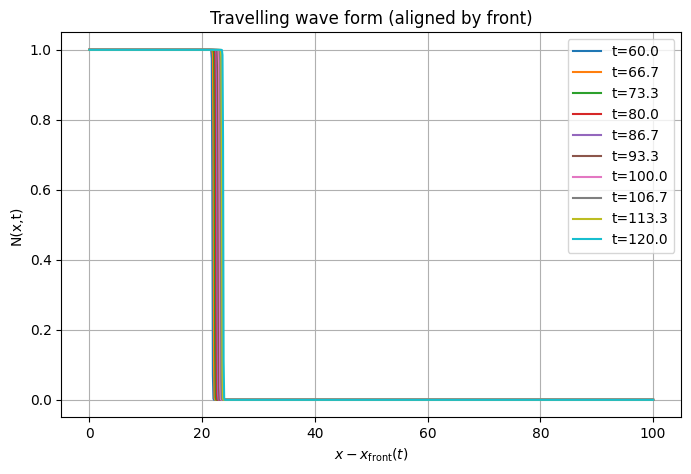

In [41]:
plot_travelling_wave_form_by_front(model2, target='N')

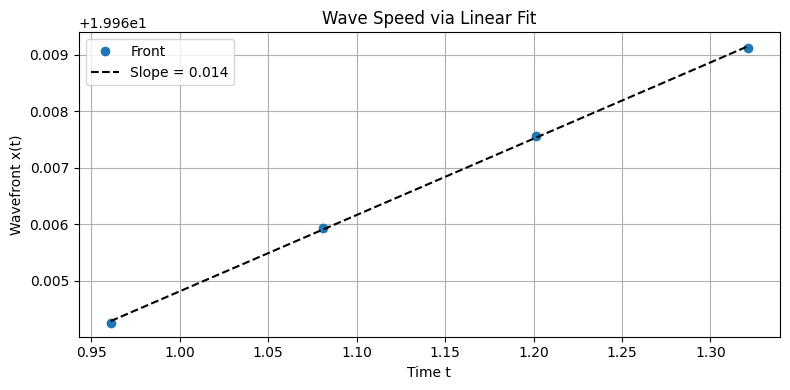

Estimated speed = 0.0135, R² = 0.9997


(np.float64(0.013512427436276963),
 np.float64(19.951301376299163),
 np.float64(0.9997151498133823))

In [42]:
model2.estimate_wave_speed(t_start=0, t_end=model.T, target='N', num_points = 1000, threshold=0.5, band=(0.1, 0.9), spline_type='cubic')

In [37]:
model3 = Dissertation_Const_1D(m0 = 0.8, const = 100, k = 10, n0 = 0.5, L = 100, N = 1001, T = 120, dt = 0.01)

In [38]:
model3.solve()

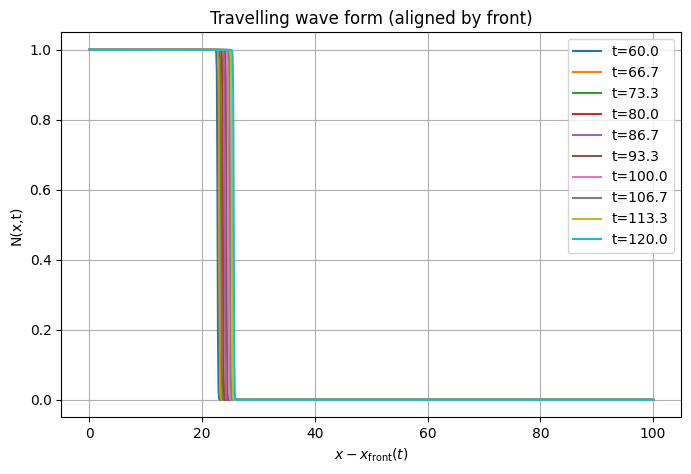

In [43]:
plot_travelling_wave_form_by_front(model3, target='N')

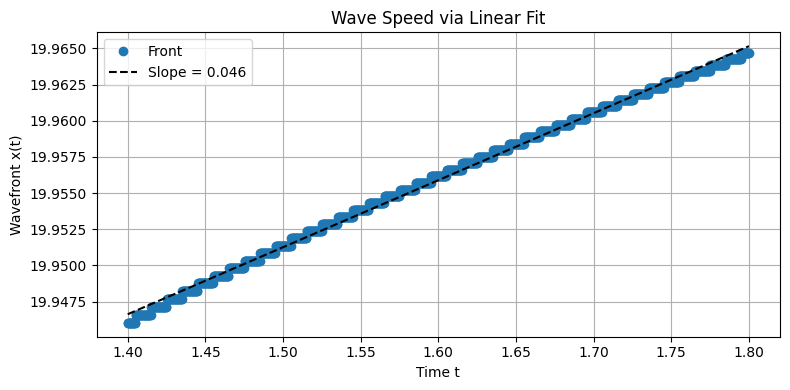

Estimated speed = 0.0463, R² = 0.9973


(np.float64(0.046299778202250105),
 np.float64(19.881812541137702),
 np.float64(0.9973129018335798))

In [55]:
model3.estimate_wave_speed(t_start=1.4, t_end=1.8, target='N', num_points = 1000, threshold=0.5, band=(0.1, 0.9), spline_type='cubic')

In [ ]:
##RUN with condition k/lambda is small